# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice, i.e. a total of 5 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



### Load and explore the datasets and understand structure and contents.

In [20]:
import pandas as pd

# Load the datasets
alldata = pd.read_excel('alldata.xlsx')
drdata = pd.read_excel('drdata.xlsx')
drq = pd.read_excel('drq.xlsx')
tv2data = pd.read_excel('tv2data.xlsx')
tv2q = pd.read_excel('tv2q.xlsx')
electeddata = pd.read_excel('electeddata.xlsx')

# Print the datasets
print("\nDR Questions:")
print(drq.head())
print(drq.info())

print("\nTV2 Questions:")
print(tv2q.head())
print(tv2q.info())

print("All Data:")
print(alldata.head())
print(alldata.info())

## The output from above provides a detailed summary of each dataset, including the number of rows and columns, the column names, 
# and the data types of each column. This information helps understand the structure and contents of the datasets 
# and to identify any potential issues or inconsistencies in the data.


DR Questions:
    ID                     Title  \
0  530           KLIMA OG ENERGI   
1  531  ARBEJDSMARKED OG ØKONOMI   
2  533              RET OG STRAF   
3  534            EU OG UDENRIGS   
4  535            EU OG UDENRIGS   

                                            Question  Info  \
0  Danmark skal bruge flere penge på at styrke to...   NaN   
1  Der skal indføres en særlig skat på de allerhø...   NaN   
2  Kriminalitet begået i udsatte boligområder ska...   NaN   
3               På sigt skal Danmark meldes ud af EU   NaN   
4  Det er fornuftigt, at Danmark i de kommende år...   NaN   

                                         ArgumentFor  \
0  Den kollektive trafik bør være billig og tilgæ...   
1  Historisk rammer kriser de fattigste hårdest. ...   
2  Den mest effektive måde at stoppe bandekrimina...   
3  Så længe Danmark er medlem af EU, kan flertall...   
4  Ruslands angreb på Ukraine har ændret alting o...   

                                     ArgumentAgainst  Word

### Once we have Identified the structure and contents of the datasets, we can proceed with data cleaning, preprocessing, and analysis

In [21]:
# Load the alldata dataset
alldata = pd.read_excel('alldata.xlsx')

# Check for NaN values
nan_summary = alldata.isnull().sum()

# Filter out columns that have NaN values
nan_columns = nan_summary[nan_summary > 0]

print("Columns with NaN values and their total count:")
print(nan_columns)

Columns with NaN values and their total count:
Series([], dtype: int64)


### #1 Age(Average) of the candidates grouped by parties.

In [22]:
# Load the dataset
alldata = pd.read_excel('alldata.xlsx')

# Calculate average age by party
average_age_by_party = alldata.groupby('parti')['alder'].mean().reset_index()

average_age_by_party.columns = ['Party', 'Average Age']

# Print the result
print(average_age_by_party)


                                          Party  Average Age
0                                  Alternativet    46.000000
1                          Danmarksdemokraterne    51.216216
2                              Dansk Folkeparti    45.530612
3                   Det Konservative Folkeparti    42.897959
4                                  Enhedslisten    40.513514
5   Frie Grønne, Danmarks Nye Venstrefløjsparti    34.807692
6                           Kristendemokraterne    49.023810
7                              Liberal Alliance    36.885714
8                                     Løsgænger    48.000000
9                                   Moderaterne    44.261905
10                               Nye Borgerlige    47.568627
11                             Radikale Venstre    44.955224
12                            Socialdemokratiet    44.344828
13                      Socialistisk Folkeparti    40.928571
14                                      Venstre    46.678571


### #2 An overview of the most "confident" candidates (those with the highest proportion of "strongly agree" or "strongly disagree" responses.)

                    navn                                        parti  alder  \
505         Sarah Nørris                                 Enhedslisten     43   
88         Søren Vanting                  Det Konservative Folkeparti     50   
559  Kim Andkjær Doberck                               Nye Borgerlige     43   
44     Mohamed Abdikarim  Frie Grønne, Danmarks Nye Venstrefløjsparti     33   
152           Rashid Ali  Frie Grønne, Danmarks Nye Venstrefløjsparti     38   

     strong_response_proportion  
505                        1.00  
88                         1.00  
559                        0.90  
44                         0.88  
152                        0.88  


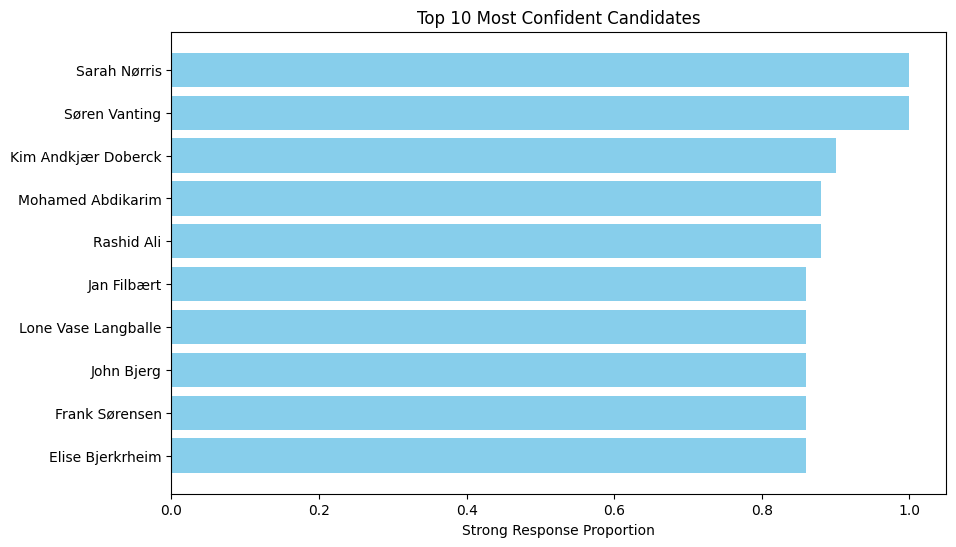

In [23]:
# Identify columns with responses (using numeric data types)
response_columns = alldata.select_dtypes(include='number').drop(columns=['alder'])

# Set ondition for Strongly agree or Strongly disagree (responses = 2 or -2)
strong_responses = response_columns.map(lambda x: 1 if x == 2 or x == -2 else 0)

# Sum the number of strong responses for each candidate
alldata['strong_response_count'] = strong_responses.sum(axis=1)

# Calculate the total number of questions (to calculate proportion)
total_questions = len(response_columns.columns)

# Calculate the proportion of strong responses for each candidate
alldata['strong_response_proportion'] = alldata['strong_response_count'] / total_questions

# Sort candidates by proportion of strong responses, highest first
confident_candidates = alldata[['navn', 'parti', 'alder', 'strong_response_proportion']].sort_values(by='strong_response_proportion', ascending=False)

# Round the strong response proportion for readability
confident_candidates['strong_response_proportion'] = confident_candidates['strong_response_proportion'].round(2)

# Display the most confident candidates
print(confident_candidates.head())

## Visualize top 10 most confident candidates using Bar Chart
import matplotlib.pyplot as plt

# Plotting the top 10 most confident candidates
top_10 = confident_candidates.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10['navn'], top_10['strong_response_proportion'], color='skyblue')
plt.xlabel('Strong Response Proportion')
plt.title('Top 10 Most Confident Candidates')
plt.gca().invert_yaxis()  # To have the highest at the top
plt.show()



### Does the age of a candidate have an influence?

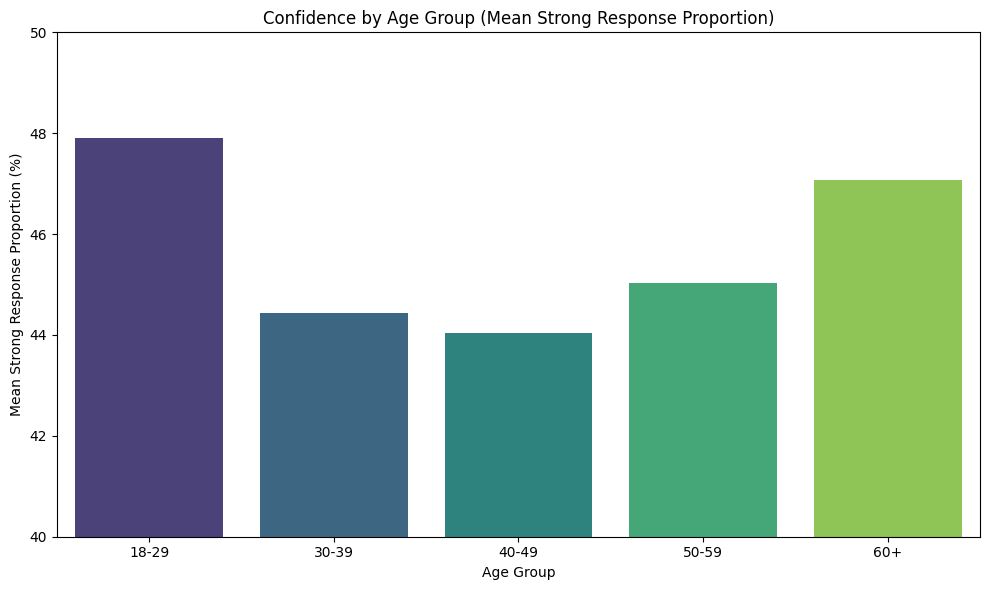

In [24]:
import seaborn as sns

# Define age groups for analysis
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
alldata['age_group'] = pd.cut(alldata['alder'], bins=bins, labels=labels)

# Calculate mean strong response proportion for each age group
age_group_confidence = alldata.groupby('age_group', observed=True)['strong_response_proportion'].mean().sort_values(ascending=False)

# Visualize confidence by age group using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_confidence.index, y=age_group_confidence.values * 100, hue=age_group_confidence.index, palette='viridis', dodge=False, legend=False)
plt.title('Confidence by Age Group (Mean Strong Response Proportion)')
plt.xlabel('Age Group')
plt.ylabel('Mean Strong Response Proportion (%)')
plt.ylim(40, 50)
plt.tight_layout()
plt.show()

In [25]:
#This suggests that candidates at the beginning and near the end of their careers tend to express stronger opinions, while middle-aged candidates tend to be somewhat less decisive.

### #3 Differences in responses between candidates, both inter-party(between different parties) and intra-party(within a single party), along with an explanation of which parties have the most internal disagreements.

Inter-Party Differences (Standard Deviation of Mean Responses):
530    1.203311
531    1.462563
533    1.247591
534    1.385433
535    1.239698
537    1.339193
538    1.026799
540    1.318766
541    1.410861
543    1.296844
544    1.342176
545    1.018164
546    1.447270
547    1.346795
548    1.093385
550    1.427688
551    1.389689
552    0.858176
553    0.936377
555    1.529495
556    1.444438
557    0.874363
559    1.311611
561    1.113347
563    1.238927
1a     1.233619
1b     1.213325
2a     0.867352
2b     1.083115
3a     1.211964
3b     1.510170
4a     1.147823
4b     0.687898
5a     0.553775
5b     0.392251
6a     1.477527
6b     1.464101
7a     1.438343
7b     0.761704
8a     0.353087
8b     0.580724
9a     1.143481
9b     0.454709
10a    0.902441
10b    1.394466
11a    1.194771
11b    1.347934
12a    0.617171
12b    0.741708
dtype: float64

Intra-Party Differences (Standard Deviation within Each Party):
                                                  530       531       53

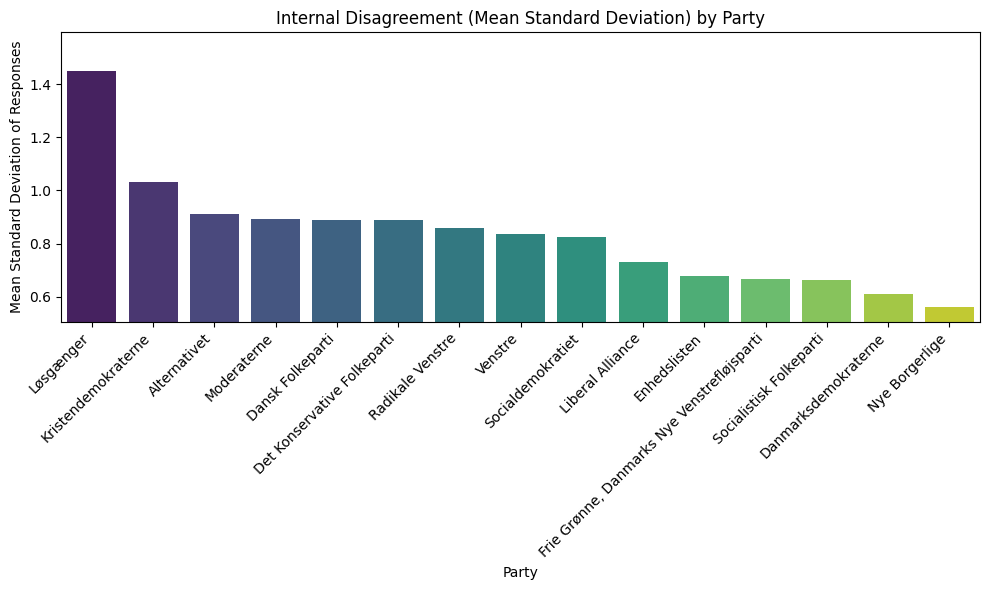

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
alldata = pd.read_excel('alldata.xlsx')

# Step 1: Identify response columns
# Assuming the response columns are all numeric columns except for 'alder' and 'parti' columns
feature_columns = alldata.select_dtypes(include='number').drop(columns=['alder']).columns

# Step 2: Calculate the average response value for each question to measure inter-party differences
party_mean_responses = alldata.groupby('parti')[feature_columns].mean()

# Step 3: Calculate the standard deviation across the party means to measure differences between parties
inter_party_diff_std = party_mean_responses.std()

# Step 4: Calculate the standard deviation of responses within each party to measure intra-party differences
intra_party_diffs = alldata.groupby('parti')[feature_columns].std()

# Step 5: Calculate the mean standard deviation for each party to identify which has the most internal disagreements
internal_disagreement = intra_party_diffs.mean(axis=1).sort_values(ascending=False)

# Print the results for inter-party differences
print("Inter-Party Differences (Standard Deviation of Mean Responses):")
print(inter_party_diff_std)

# Print the results for intra-party differences
print("\nIntra-Party Differences (Standard Deviation within Each Party):")
print(intra_party_diffs)

# Print the parties with the most internal disagreement
print("\nParties with Most Internal Disagreement (Mean Standard Deviation):")
print(internal_disagreement)

# Step 6: Visualization - Bar Plot for Internal Disagreement
plt.figure(figsize=(10, 6))
sns.barplot(x=internal_disagreement.index, y=internal_disagreement.values, hue=internal_disagreement.index, palette='viridis', dodge=False, legend=False)
plt.title('Internal Disagreement (Mean Standard Deviation) by Party')
plt.xlabel('Party')
plt.ylabel('Mean Standard Deviation of Responses')
plt.xticks(rotation=45, ha='right')
plt.ylim(internal_disagreement.values.min() * 0.9, internal_disagreement.values.max() * 1.1)
plt.tight_layout()
plt.show()


### #4 Classification Models to predict candidates' party affiliations. 
Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. Use following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice, i.e. a total of 5 models are to be trained.

Decision Tree Accuracy: 0.7528735632183908
                                             precision    recall  f1-score   support

                               Alternativet       0.60      0.46      0.52        13
                       Danmarksdemokraterne       0.92      0.86      0.89        14
                           Dansk Folkeparti       0.70      0.70      0.70        10
                Det Konservative Folkeparti       0.65      0.72      0.68        18
                               Enhedslisten       0.91      0.91      0.91        11
Frie Grønne, Danmarks Nye Venstrefløjsparti       0.67      0.67      0.67         6
                        Kristendemokraterne       1.00      0.62      0.77         8
                           Liberal Alliance       0.67      0.59      0.62        17
                                  Løsgænger       0.00      0.00      0.00         0
                                Moderaterne       0.67      1.00      0.80         2
                     

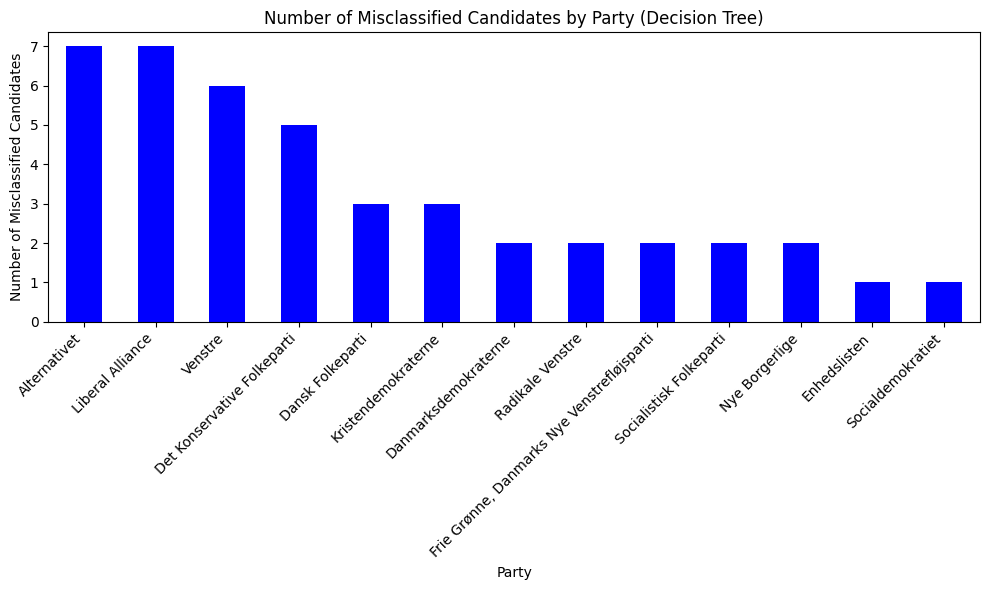

Random Forest Accuracy: 0.9482758620689655
                                             precision    recall  f1-score   support

                               Alternativet       0.87      1.00      0.93        13
                       Danmarksdemokraterne       1.00      0.93      0.96        14
                           Dansk Folkeparti       0.90      0.90      0.90        10
                Det Konservative Folkeparti       0.86      1.00      0.92        18
                               Enhedslisten       0.91      0.91      0.91        11
Frie Grønne, Danmarks Nye Venstrefløjsparti       1.00      0.67      0.80         6
                        Kristendemokraterne       1.00      1.00      1.00         8
                           Liberal Alliance       1.00      0.88      0.94        17
                                Moderaterne       1.00      1.00      1.00         2
                             Nye Borgerlige       0.94      1.00      0.97        16
                     

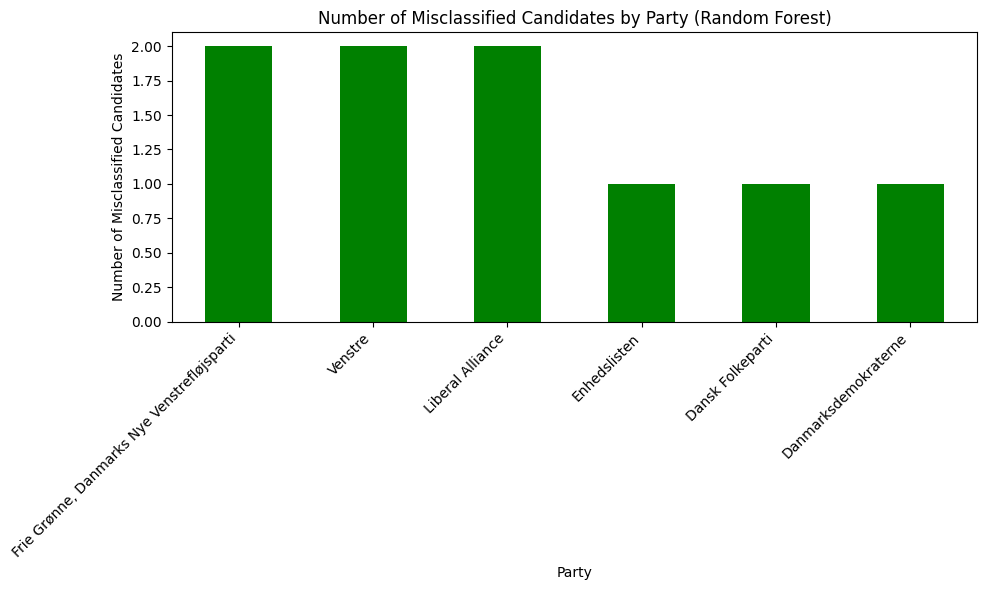

Gradient Boosted Trees Accuracy: 0.8850574712643678
                                             precision    recall  f1-score   support

                               Alternativet       0.73      0.85      0.79        13
                       Danmarksdemokraterne       1.00      0.93      0.96        14
                           Dansk Folkeparti       0.83      1.00      0.91        10
                Det Konservative Folkeparti       0.89      0.94      0.92        18
                               Enhedslisten       0.91      0.91      0.91        11
Frie Grønne, Danmarks Nye Venstrefløjsparti       1.00      0.67      0.80         6
                        Kristendemokraterne       0.86      0.75      0.80         8
                           Liberal Alliance       0.83      0.88      0.86        17
                                  Løsgænger       0.00      0.00      0.00         0
                                Moderaterne       1.00      1.00      1.00         2
            

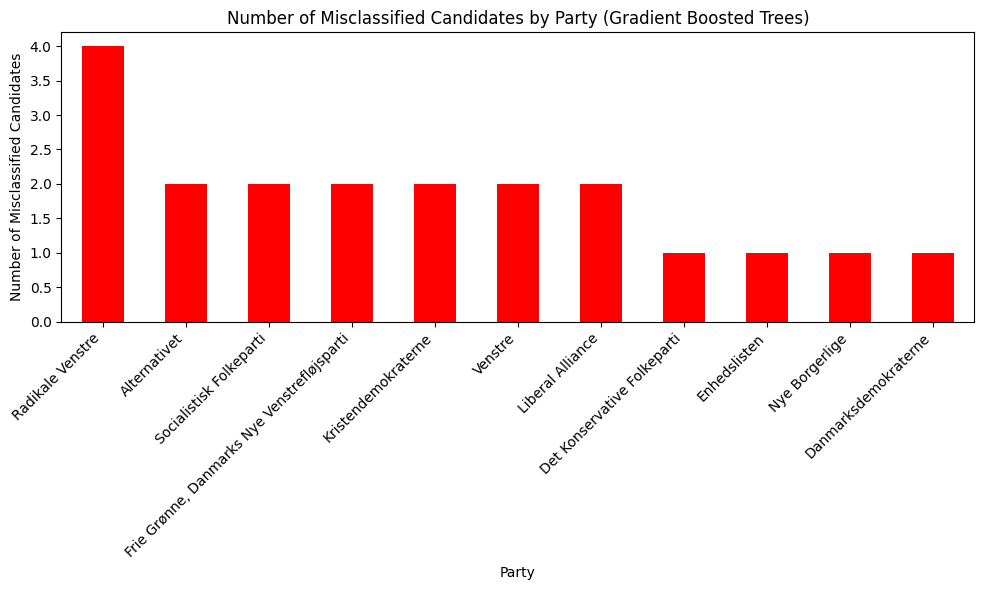

Logistic Regression Accuracy: 0.8908045977011494
                                             precision    recall  f1-score   support

                               Alternativet       0.73      0.85      0.79        13
                       Danmarksdemokraterne       1.00      0.93      0.96        14
                           Dansk Folkeparti       0.90      0.90      0.90        10
                Det Konservative Folkeparti       0.88      0.83      0.86        18
                               Enhedslisten       1.00      0.73      0.84        11
Frie Grønne, Danmarks Nye Venstrefløjsparti       0.86      1.00      0.92         6
                        Kristendemokraterne       0.73      1.00      0.84         8
                           Liberal Alliance       0.88      0.88      0.88        17
                                Moderaterne       1.00      1.00      1.00         2
                             Nye Borgerlige       0.94      0.94      0.94        16
               

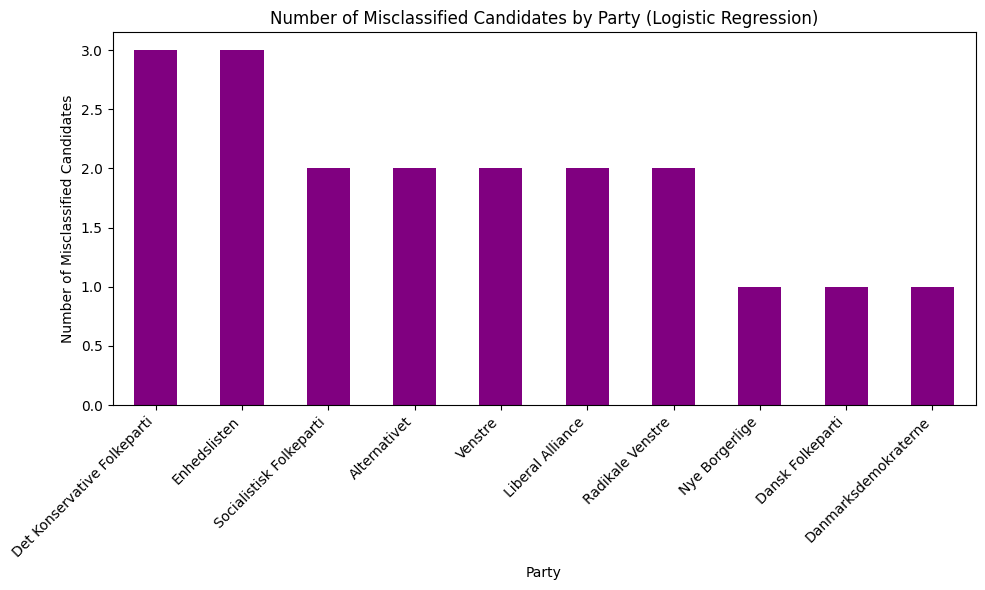

K-Nearest Neighbors Accuracy: 0.9022988505747126
                                             precision    recall  f1-score   support

                               Alternativet       0.92      0.85      0.88        13
                       Danmarksdemokraterne       1.00      0.93      0.96        14
                           Dansk Folkeparti       0.90      0.90      0.90        10
                Det Konservative Folkeparti       0.93      0.78      0.85        18
                               Enhedslisten       0.82      0.82      0.82        11
Frie Grønne, Danmarks Nye Venstrefløjsparti       1.00      0.67      0.80         6
                        Kristendemokraterne       1.00      0.88      0.93         8
                           Liberal Alliance       0.80      0.94      0.86        17
                                Moderaterne       0.67      1.00      0.80         2
                             Nye Borgerlige       0.88      0.94      0.91        16
               

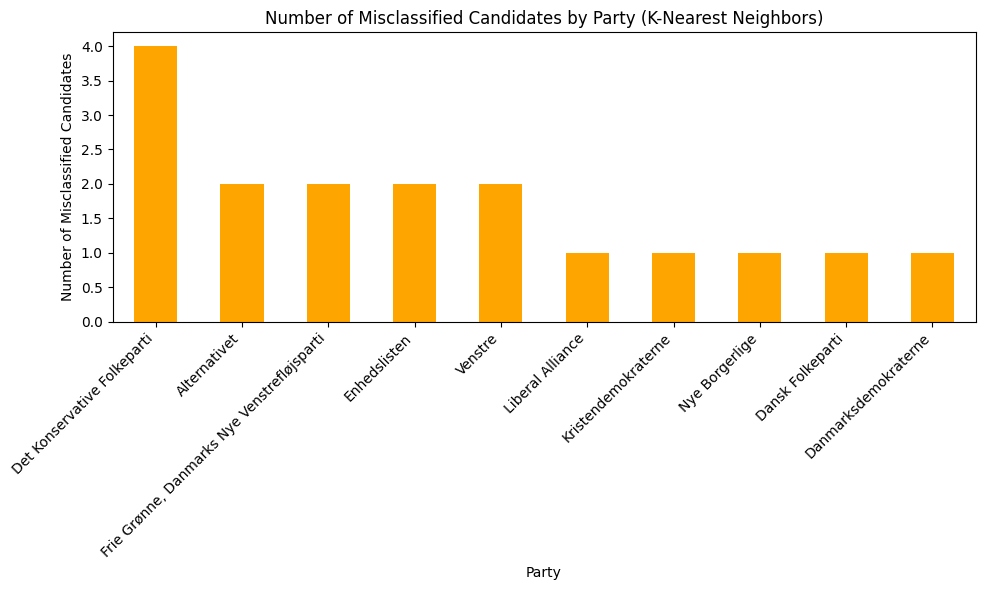

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
alldata = pd.read_excel('alldata.xlsx')

# Step 1: Data Preparation
# Define feature columns (responses) and target column (party)
feature_columns = alldata.select_dtypes(include='number').drop(columns=['alder']).columns
X = alldata[feature_columns]
y = alldata['parti']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train and Evaluate Models

# 1. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions, zero_division=0))

# Extract Misclassified Candidates (Decision Tree) by comparing the actual values (y_test) with the predicted values (dt_predictions)
dt_misclassified_indices = y_test[y_test != dt_predictions].index #filter out only those elements where there is a mismatch.
dt_misclassified_candidates = alldata.loc[dt_misclassified_indices] #get the misclassified candidates
print("\nMisclassified Candidates (Decision Tree):")
print(dt_misclassified_candidates[['navn', 'parti']])

# Plot Misclassified Candidates by Party (Decision Tree)
plt.figure(figsize=(10, 6))
dt_misclassified_counts = dt_misclassified_candidates['parti'].value_counts().apply(lambda x: round(x))
dt_misclassified_counts.plot(kind='bar', color='blue')
plt.title('Number of Misclassified Candidates by Party (Decision Tree)')
plt.xlabel('Party')
plt.ylabel('Number of Misclassified Candidates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions, zero_division=0))

# Extract Misclassified Candidates (Random Forest)
rf_misclassified_indices = y_test[y_test != rf_predictions].index
rf_misclassified_candidates = alldata.loc[rf_misclassified_indices]
print("\nMisclassified Candidates (Random Forest):")
print(rf_misclassified_candidates[['navn', 'parti']])

# Plot Misclassified Candidates by Party (Random Forest)
plt.figure(figsize=(10, 6))
rf_misclassified_counts = rf_misclassified_candidates['parti'].value_counts().apply(lambda x: round(x))
rf_misclassified_counts.plot(kind='bar', color='green')
plt.title('Number of Misclassified Candidates by Party (Random Forest)')
plt.xlabel('Party')
plt.ylabel('Number of Misclassified Candidates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Gradient Boosted Trees Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_predictions = gb_model.predict(X_test_scaled)
print("Gradient Boosted Trees Accuracy:", accuracy_score(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions, zero_division=0))

# Extract Misclassified Candidates (Gradient Boosted Trees)
gb_misclassified_indices = y_test[y_test != gb_predictions].index
gb_misclassified_candidates = alldata.loc[gb_misclassified_indices]
print("\nMisclassified Candidates (Gradient Boosted Trees):")
print(gb_misclassified_candidates[['navn', 'parti']])

# Plot Misclassified Candidates by Party (Gradient Boosted Trees)
plt.figure(figsize=(10, 6))
gb_misclassified_counts = gb_misclassified_candidates['parti'].value_counts().apply(lambda x: round(x))
gb_misclassified_counts.plot(kind='bar', color='red')
plt.title('Number of Misclassified Candidates by Party (Gradient Boosted Trees)')
plt.xlabel('Party')
plt.ylabel('Number of Misclassified Candidates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions, zero_division=0))

# Extract Misclassified Candidates (Logistic Regression)
lr_misclassified_indices = y_test[y_test != lr_predictions].index
lr_misclassified_candidates = alldata.loc[lr_misclassified_indices]
print("\nMisclassified Candidates (Logistic Regression):")
print(lr_misclassified_candidates[['navn', 'parti']])

# Plot Misclassified Candidates by Party (Logistic Regression)
plt.figure(figsize=(10, 6))
lr_misclassified_counts = lr_misclassified_candidates['parti'].value_counts().apply(lambda x: round(x))
lr_misclassified_counts.plot(kind='bar', color='purple')
plt.title('Number of Misclassified Candidates by Party (Logistic Regression)')
plt.xlabel('Party')
plt.ylabel('Number of Misclassified Candidates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions, zero_division=0))

# Extract Misclassified Candidates (K-Nearest Neighbors)
knn_misclassified_indices = y_test[y_test != knn_predictions].index
knn_misclassified_candidates = alldata.loc[knn_misclassified_indices]
print("\nMisclassified Candidates (K-Nearest Neighbors):")
print(knn_misclassified_candidates[['navn', 'parti']])

# Plot Misclassified Candidates by Party (K-Nearest Neighbors)
plt.figure(figsize=(10, 6))
knn_misclassified_counts = knn_misclassified_candidates['parti'].value_counts().apply(lambda x: round(x))
knn_misclassified_counts.plot(kind='bar', color='orange')
plt.title('Number of Misclassified Candidates by Party (K-Nearest Neighbors)')
plt.xlabel('Party')
plt.ylabel('Number of Misclassified Candidates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()